In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

[[1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]
 [1.28155157 0.        ]


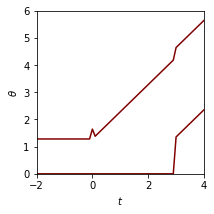

In [48]:
def acceptance_region(td,lo_p,hi_p):
    return [td.ppf(lo_p) if lo_p > 0 else -100,td.ppf(hi_p) if hi_p < 1 else 100]


def get_band(h0_dists, alpha, interval):
    if interval=='upper':
        lo_p,hi_p = alpha,1
    elif interval=='central':
        lo_p,hi_p = alpha/2,1-alpha/2
    band = np.array([acceptance_region(td,lo_p,hi_p) for td in h0_dists])
    return band


def get_flip_flop_band(data, alpha, hypos):
    if data < 0:
        return get_obs_interval(0.0, hypos, alpha, 'upper')
    if 0 < data < 3:
        return get_obs_interval(data, hypos, alpha, 'upper')
    return get_obs_interval(data, hypos, alpha, 'central')

def get_obs_interval(data,hypos, alpha, interval):
    h0_dists = [sps.norm(mu,1) for mu in hypos] # for flip-flopping plots
    band = get_band(h0_dists, alpha, interval)
    upper,lower = band[:,0],band[:,1]
    int_upper = np.interp(data,upper,hypos)
    int_lower = np.interp(data,lower,hypos)
    return int_upper,int_lower

def plot_neyman(data = 5, fname = 'plot.png', plot_mle=False, plot_data=False, plot_interval = False, alpha = 0.1):
    hypos  = np.linspace(0,20,201)
    dspace = np.linspace(-5,5,101)


    a = np.array([get_flip_flop_band(d, alpha, hypos) for d in dspace])
    print(a)
    plt.plot(dspace,a[:,0], c = 'maroon')
    plt.plot(dspace,a[:,1], c = 'maroon')

    plt.xlim(-2,4)
    plt.ylim(0,6)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$\theta$')
    plt.gcf().set_size_inches(3,3)
    plt.savefig(fname, dpi=600)

plot_neyman(data = 3, fname = f'flipflop.png', plot_data = True, plot_mle = True, plot_interval=True)

In [33]:
!open .